In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
random_index = np.random.randint(0, train_images.shape[0])

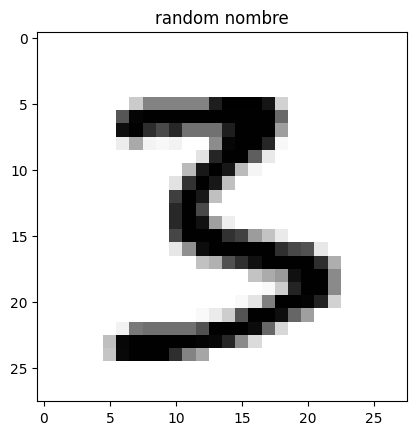

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[random_index ], cmap=plt.cm.binary)
plt.title('random nombre')
plt.show()

In [8]:
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
# les images sont deja normalisées

## implementation d'un rz de neuronnes à une seule couche

In [9]:
train_labels = to_categorical(train_labels) #fonction de keras 
test_labels = to_categorical(test_labels)

### choix du Sequential commme model

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))  # Perceptron 
model.add(Dense(10, activation='softmax'))  # Output 

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


469/469 [==============================] - 7s 11ms/step - loss: 0.2652 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1063 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0502 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9889


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc) 

313/313 [==============================] - 2s 6ms/step - loss: 0.0600 - accuracy: 0.9812
Test accuracy: 0.9811999797821045
